In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc


import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [10]:
dataset = pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/Bacillus Subtilis 168/pre.csv")
# dataset = pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/TyphiLT2/data.csv")
feature=['CAI','CBI','Fop','GC','Essentiality','GC3s','L_sym','L_aa','Gravy','Aromo']
add=['#Function']
homo=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15']
network=['BC','CC','CCO','DC','Stress','NC']
features=feature
features+=homo
# features+=add
features+=network
print features
df=dataset[features]
#df['Nc'] = pd.to_numeric(df['Nc'],errors='coerce')
df['GC']=df['GC'].fillna(0)
df['GC3s']=df['GC3s'].fillna(0)
df['L_sym']=df['L_sym'].fillna(0)
df['L_aa']=df['L_aa'].fillna(0)
df['Gravy']=df['Gravy'].fillna(0)
df['Aromo']=df['Aromo'].fillna(0)
df=df[df.GC!=0]
df=df[df.DC!=0]
# le = preprocessing.LabelEncoder()
# df['#Function']=le.fit_transform(df['#Function'])
df = df.sample(frac=1).reset_index(drop=False)
df.info()
df.head(5)
features.remove('Essentiality')
print features
X_train=df[features]
Y_train=df['Essentiality']
print X_train.head()

['CAI', 'CBI', 'Fop', 'GC', 'Essentiality', 'GC3s', 'L_sym', 'L_aa', 'Gravy', 'Aromo', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'BC', 'CC', 'CCO', 'DC', 'Stress', 'NC']


/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3681 entries, 0 to 3680
Data columns (total 32 columns):
index           3681 non-null int64
CAI             3681 non-null float64
CBI             3681 non-null float64
Fop             3681 non-null float64
GC              3681 non-null float64
Essentiality    3681 non-null int64
GC3s            3681 non-null float64
L_sym           3681 non-null float64
L_aa            3681 non-null float64
Gravy           3681 non-null float64
Aromo           3681 non-null float64
H1              3681 non-null int64
H2              3681 non-null int64
H3              3681 non-null int64
H4              3681 non-null int64
H5              3681 non-null int64
H6              3681 non-null int64
H7              3681 non-null int64
H8              3681 non-null int64
H9              3681 non-null int64
H10             3681 non-null int64
H11             3681 non-null int64
H12             3681 non-null int64
H13             3681 non-null int64
H14        

In [11]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, test_size = 0.2,random_state=23)
# print features
# X_train=train[features]
# X_train=X_train.reset_index(drop=True)
# Y_train=train['Essentiality']
# Y_train=Y_train.reset_index(drop=True)
# X_test=test[features]
# X_test=X_test.reset_index(drop=True)
# Y_test=test['Essentiality']
# Y_test=Y_test.reset_index(drop=True)
# print X_train.head(5)
# print Y_train.head(5)
# print Y_train.shape
# print Y_test.shape
# X_train=df[features]
# Y_train=df['Essentiality']

In [12]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
# X_test = scaler.transform(X_test)
# print X_train[0:5]


Time Taken =0.167254 


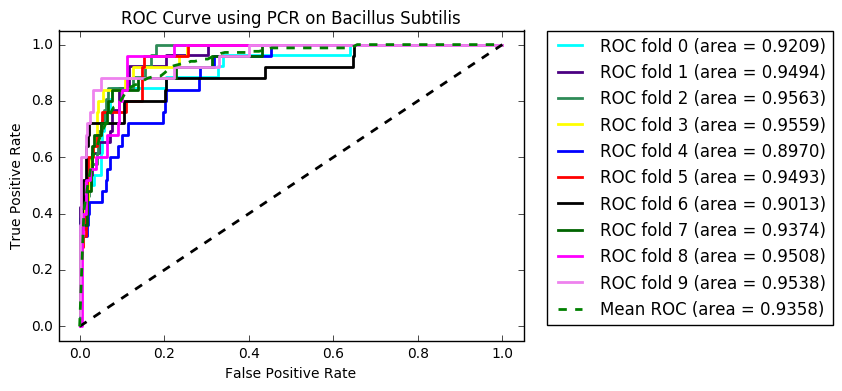

162 MB


In [20]:
from sklearn import cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from scipy import interp
from itertools import cycle
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import timeit

pca = PCA()
X_train=pca.fit_transform(X_train)
clf =LinearRegression()

# clf.fit(X_train,Y_train)
# pred=clf.predict(X_test)
# print pred[0:5]


# print len(X_train)
# print Y_train.shape

#kf_total =cross_validation.KFold(len(X_train), n_folds=10,shuffle=True, random_state=4)
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=23)
#kf=KFold(n_splits=10,shuffle=True,random_state=23)
skf.get_n_splits(X_train,Y_train)

mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)


colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])
lw = 2

i = 0

start= timeit.default_timer()

for (train, test), color in zip(skf.split(X_train,Y_train), colors):
    probas_ = clf.fit(X_train[train],Y_train[train]).predict(X_train[test])
            
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_train[test], probas_)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
    i += 1
    
stop = timeit.default_timer()
print "Time Taken =%f " %(stop-start)

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')

mean_tpr /= skf.get_n_splits(X_train,Y_train)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',label='Mean ROC (area = %0.4f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using PCR on Bacillus Subtilis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"

In [14]:
data = pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/TyphiLT2/data.csv")
# data= pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/Bacillus Subtilis 168/pre.csv")
features=['CAI','CBI','Fop','GC','Essentiality','GC3s','L_sym','L_aa','Gravy','Aromo']
add=['#Function']
homo=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15']
network=['BC','CC','CCO','DC','Stress','NC']
features+=homo
# features+=add
features+=network
print features
df1=data[features]
#df['Nc'] = pd.to_numeric(df['Nc'],errors='coerce')
df1['GC']=df1['GC'].fillna(0)
df1['GC3s']=df1['GC3s'].fillna(0)
df1['L_sym']=df1['L_sym'].fillna(0)
df1['L_aa']=df1['L_aa'].fillna(0)
df1['Gravy']=df1['Gravy'].fillna(0)
df1['Aromo']=df1['Aromo'].fillna(0)
df1=df1[df1.GC!=0]
df1=df1[df1.DC!=0]
# le = preprocessing.LabelEncoder()
# df1['#Function']=le.fit_transform(df1['#Function'])
df1=df1.sample(frac=1).reset_index(drop=False)
df1.info()
print df1.sample(5)
features.remove('Essentiality')
test_data=df1[features]
test_label=df1['Essentiality']

['CAI', 'CBI', 'Fop', 'GC', 'Essentiality', 'GC3s', 'L_sym', 'L_aa', 'Gravy', 'Aromo', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'BC', 'CC', 'CCO', 'DC', 'Stress', 'NC']


/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336 entries, 0 to 4335
Data columns (total 32 columns):
index           4336 non-null int64
CAI             4336 non-null float64
CBI             4336 non-null float64
Fop             4336 non-null float64
GC              4336 non-null float64
Essentiality    4336 non-null int64
GC3s            4336 non-null float64
L_sym           4336 non-null float64
L_aa            4336 non-null float64
Gravy           4336 non-null float64
Aromo           4336 non-null float64
H1              4336 non-null int64
H2              4336 non-null int64
H3              4336 non-null int64
H4              4336 non-null int64
H5              4336 non-null int64
H6              4336 non-null int64
H7              4336 non-null int64
H8              4336 non-null int64
H9              4336 non-null int64
H10             4336 non-null int64
H11             4336 non-null int64
H12             4336 non-null int64
H13             4336 non-null int64
H14        

/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(test_data)

# Scale the test set
test_data = scaler.transform(test_data)


Time Taken =0.007335


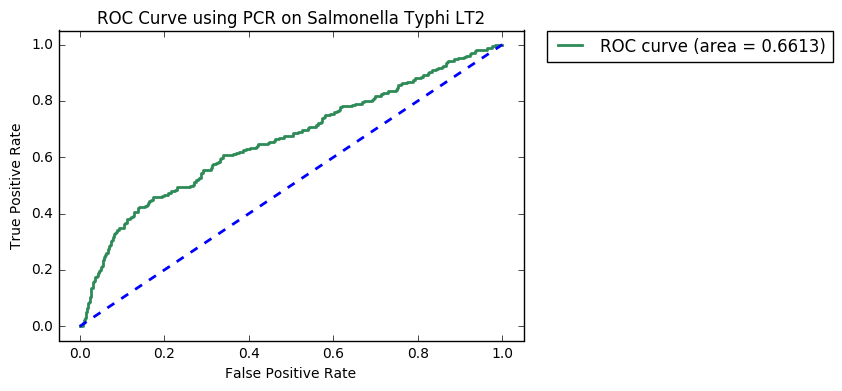

In [17]:
# clf=XGBClassifier()
# clf=RandomForestClassifier()
# clf=DecisionTreeClassifier()
# clf=KNeighborsClassifier(n_neighbors = 25)
# clf=GaussianNB()

pca = PCA()
test_data=pca.fit_transform(test_data)
clf=LinearRegression()

# mean_tpr = 0.0
# mean_fpr = np.linspace(0,1,100)


# colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])

lw = 2
start = timeit.default_timer()
#Compute ROC curve and area the curve
clf.fit(X_train,Y_train)
probas_=clf.predict(test_data)
stop = timeit.default_timer()
print "Time Taken =%f"%(stop-start)
fpr, tpr, thresholds = roc_curve(test_label, probas_)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=lw, color='seagreen',label='ROC curve (area = %0.4f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='blue')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using PCR on Salmonella Typhi LT2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"

